In [3]:
import mysql.connector as sql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine  # Import the create_engine function

config = {
    'user': 'root',
    'password': '',
    'host': 'localhost',
    'database': 'ahmeddb'
}

print("Enter Password for Data Base: ")
config['password']=input()

# Establish a connection to the MySQL database using SQLAlchemy
conn = create_engine(f"mysql+mysqlconnector://{config['user']}:{config['password']}@{config['host']}/{config['database']}")




Enter Password for Data Base: 
m


In [2]:
query="SELECT * FROM mortgage_leads"

df=pd.read_sql_query(query, conn)


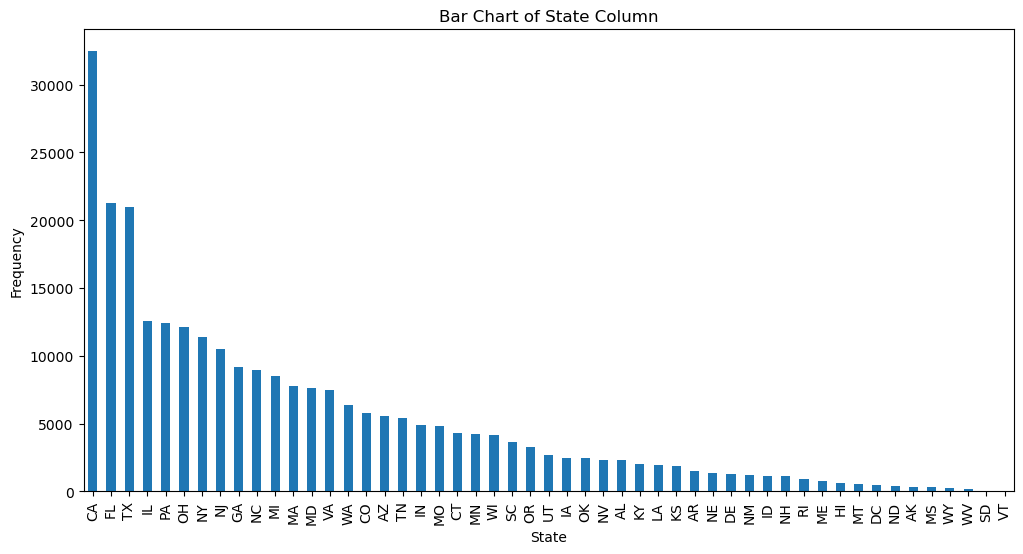

In [16]:
state_counts = df['State'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6)) 
state_counts.plot(kind='bar')

plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Bar Chart of State Column')

plt.xticks(rotation=90)

plt.show()